In [181]:
import pymongo

client = pymongo.MongoClient('mongodb://3.35.46.109:27017/')
db = client.news
collection = db.articles

In [257]:
items = collection.find()
df = pd.DataFrame(items)

In [258]:
df.tail()

,_id,p_date,category,press_agency,link,title,content,removal
43573,5fd1f431571ab52fe02d4926,2020.12.09,경제,뉴스1,https://news.naver.com/main/read.nhn?mode=LSD&...,"지역난방공사, 성남시 9개 공공기관과 상생협약 체결",(세종=뉴스1) 권혁준 기자 = 한국지역난방공사는 9일 '제1차 성남시 공공기관 협...,2020.12.09
43574,5fd1f431571ab52fe02d4927,2020.12.09,경제,이데일리,https://news.naver.com/main/read.nhn?mode=LSD&...,"현대캐피탈-우체국물류지원단-전국택배노조, 전기차 보급 협약",[이데일리 김범준 기자] 현대캐피탈은 우체국물류지원단 및 전국택배연대노동조합과 함께...,2020.12.09
43575,5fd1f431571ab52fe02d4928,2020.12.09,경제,파이낸셜뉴스,https://news.naver.com/main/read.nhn?mode=LSD&...,가평 첫 메이저 'e편한세상 가평 퍼스트원' 분양,"비규제 지역으로 자금조달 용이\n대림산업, 견본주택 1월 중 오픈\n\n\n[파이낸...",2020.12.09
43576,5fd1f431571ab52fe02d4929,2020.12.09,경제,헤럴드경제,https://news.naver.com/main/read.nhn?mode=LSD&...,6억 미만 주택 재산세율 0.05%p↓…지방세법 통과,공시가격 현실화 따른 조세 부담 감경\n[헤럴드경제=정윤희 기자]국회는 9일 본회의...,2020.12.09
43577,5fd1f431571ab52fe02d492a,2020.12.09,경제,매일경제,https://news.naver.com/main/read.nhn?mode=LSD&...,"개도국 ""한국 발전경험 배우자""…잇딴 러브콜","9일 글로벌코리아 박람회 개막\n경사연·LH 주최, 韓국제협력 성과공유\n코로나19...",2020.12.09


### 데이터 전처리

In [259]:
from datetime import date, timedelta
yesterday = date.today() - timedelta(1)
date = yesterday.strftime('%Y.%m.%d')
df = df[df['p_date'] == date]
df['removal'] = date

In [260]:
#결측치 제거
df.drop(df.loc[df['content']==''].index, inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

_id             0
p_date          0
category        0
press_agency    0
link            0
title           0
content         0
removal         0
dtype: int64

In [261]:
len(df['content'])

12989

In [262]:
df = df.drop(['_id'], axis=1)
df.reset_index(drop=True, inplace=True)
df.tail()

,p_date,category,press_agency,link,title,content,removal
12984,2020.12.09,경제,뉴스1,https://news.naver.com/main/read.nhn?mode=LSD&...,"지역난방공사, 성남시 9개 공공기관과 상생협약 체결",(세종=뉴스1) 권혁준 기자 = 한국지역난방공사는 9일 '제1차 성남시 공공기관 협...,2020.12.09
12985,2020.12.09,경제,이데일리,https://news.naver.com/main/read.nhn?mode=LSD&...,"현대캐피탈-우체국물류지원단-전국택배노조, 전기차 보급 협약",[이데일리 김범준 기자] 현대캐피탈은 우체국물류지원단 및 전국택배연대노동조합과 함께...,2020.12.09
12986,2020.12.09,경제,파이낸셜뉴스,https://news.naver.com/main/read.nhn?mode=LSD&...,가평 첫 메이저 'e편한세상 가평 퍼스트원' 분양,"비규제 지역으로 자금조달 용이\n대림산업, 견본주택 1월 중 오픈\n\n\n[파이낸...",2020.12.09
12987,2020.12.09,경제,헤럴드경제,https://news.naver.com/main/read.nhn?mode=LSD&...,6억 미만 주택 재산세율 0.05%p↓…지방세법 통과,공시가격 현실화 따른 조세 부담 감경\n[헤럴드경제=정윤희 기자]국회는 9일 본회의...,2020.12.09
12988,2020.12.09,경제,매일경제,https://news.naver.com/main/read.nhn?mode=LSD&...,"개도국 ""한국 발전경험 배우자""…잇딴 러브콜","9일 글로벌코리아 박람회 개막\n경사연·LH 주최, 韓국제협력 성과공유\n코로나19...",2020.12.09


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12989 entries, 0 to 12988
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   p_date        12989 non-null  object
 1   category      12989 non-null  object
 2   press_agency  12989 non-null  object
 3   link          12989 non-null  object
 4   title         12989 non-null  object
 5   content       12989 non-null  object
 6   removal       12989 non-null  object
dtypes: object(7)
memory usage: 710.5+ KB


In [264]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel

#### TfidfVectorizer()로 TF-idf 만들기
TfidfVectorizer()으로 각 문장에서 tfidf값을 가중치로 설정한 행렬을 만들 수 있다.

In [265]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['content'])
print(tfidf_matrix.shape)

(12989, 86849)


In [266]:
n = len(df['content'])
n

12989

In [267]:
# 코사인 유사도 함수 만들기
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [21]:
cosine_sim[0] #첫번째 문서와 5234개 문서의 유사도

array([1.        , 0.0030128 , 0.00145758, ..., 0.00261631, 0.00508075,
       0.00582749])

In [24]:
cosine_sim[0][1] #첫번째 문서와 두번째 문서간의 유사도

0.0030128028666408443

n : 문서개수, num : 중복된 기사 인덱스, i: 문서 번호, j: i번째와 j번째 문서의 유사도

In [275]:
num = []
i = 0
j = 0
l = []
cosine_sim[i][j]
for i in range(n-1):

    for j in range(1,n-1):
 
        if cosine_sim[i][j] >= 0.8:
            
            if i < j: # i < j 작개하여 리스트 요소간 중복을 피한다.
                num.append(j)
                l.append([i,j])
                #print(i,j)
                #print(cosine_sim[i][j])
                

유사도 0.9999999 

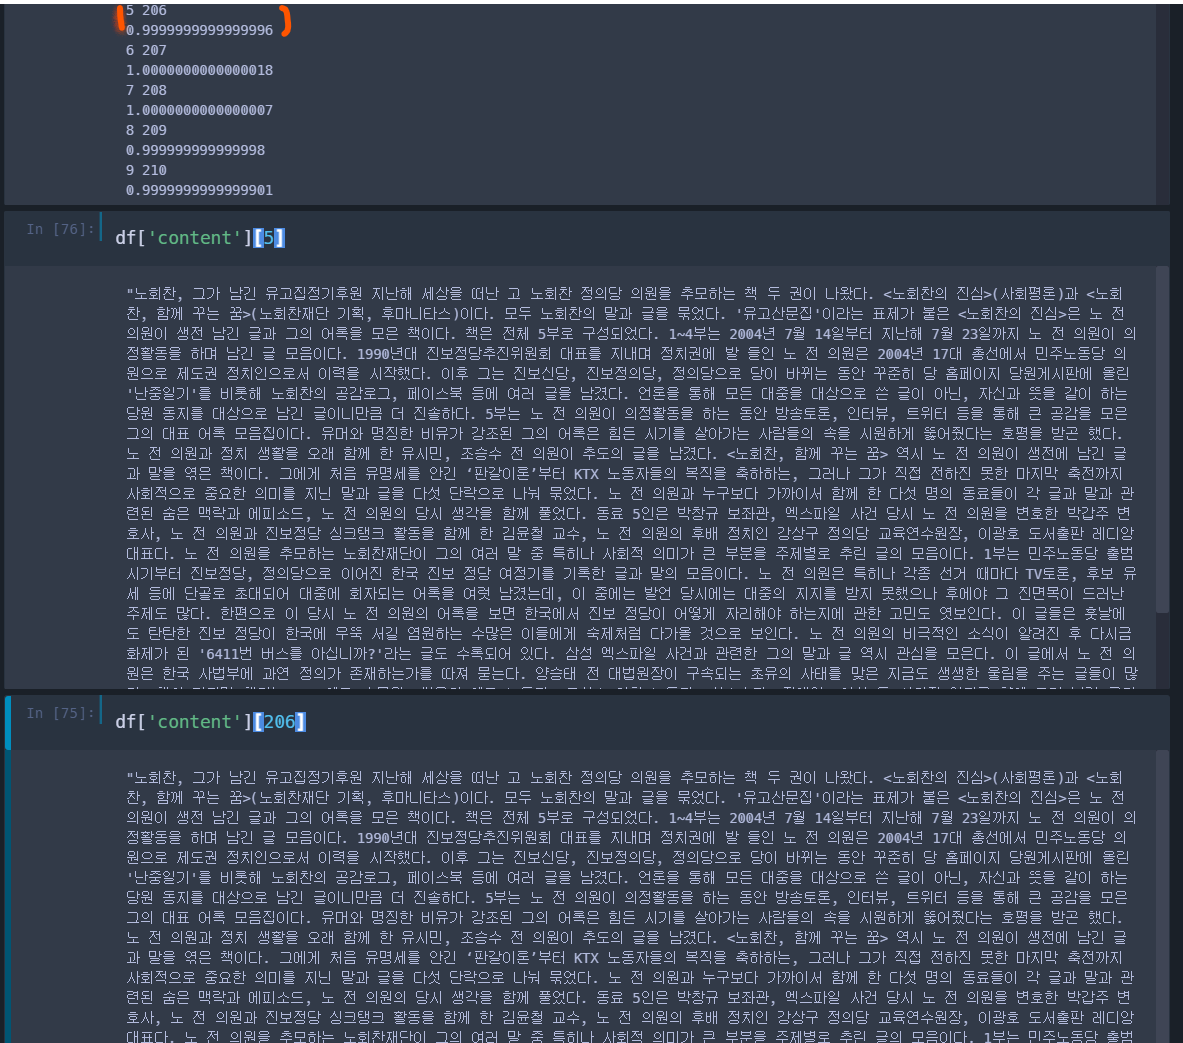

In [27]:
from IPython.display import Image 
Image('test1.png')

유사도 0.83유사도

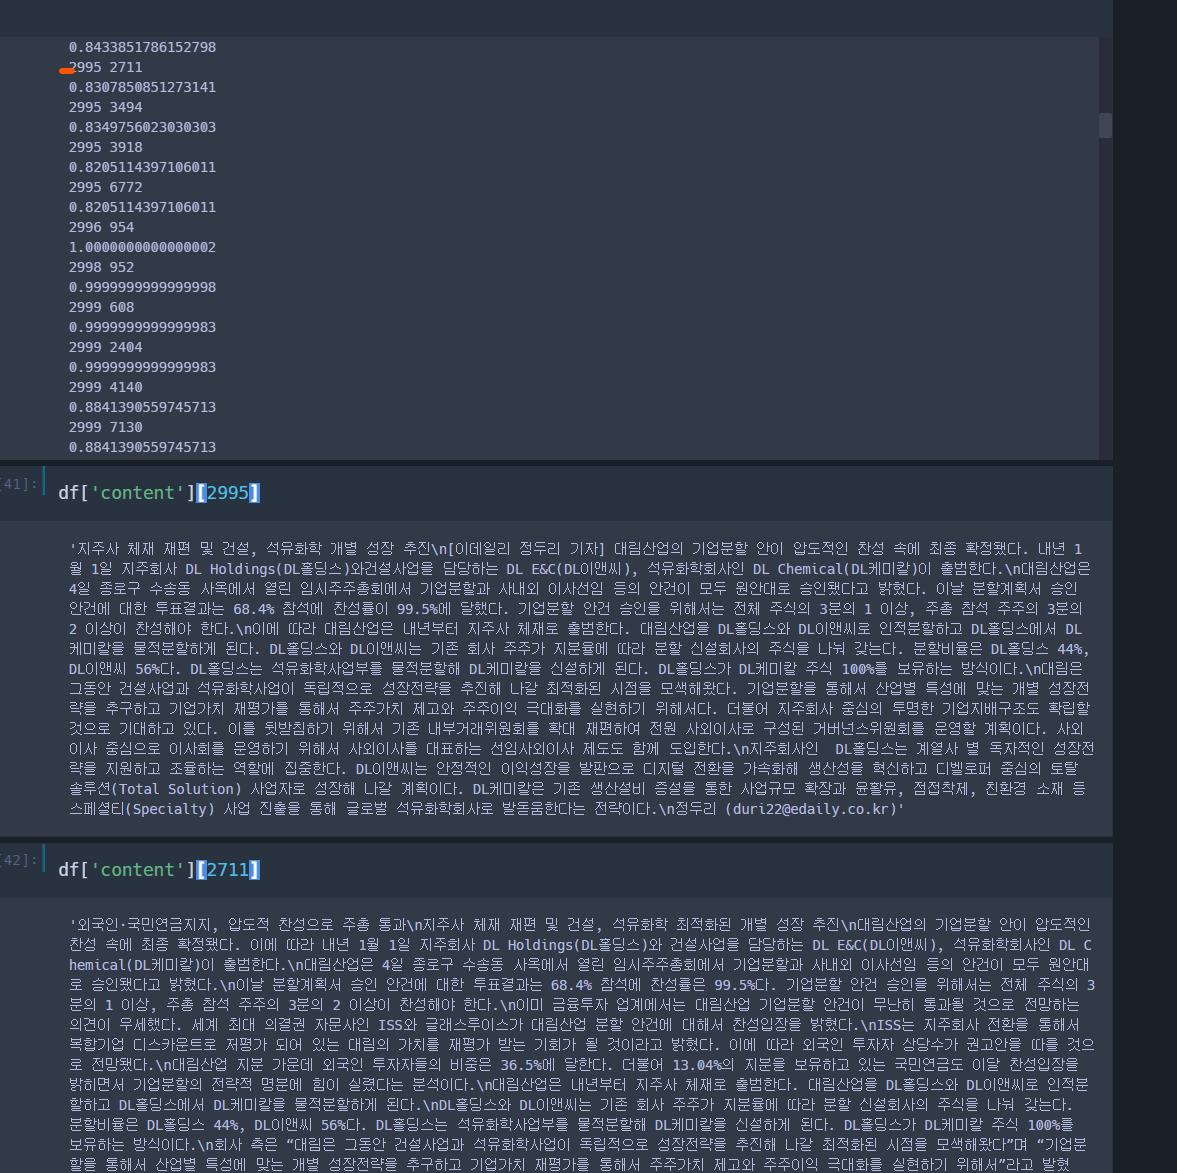

In [28]:
from IPython.display import Image 
Image('test.png')

중복된 기사 인덱스 추출하여 리스트만들기.

In [276]:
new_ = []
for v in num:
    if v not in new_:
        new_.append(v)
#len(new_), new_

만들어진 리스트로 중복기사 제거

In [ ]:
t = df.drop(index=new_)
t.reset_index(drop=True, inplace=True)

#### 전처리 및 중복기사 제거 완료

In [220]:
t.tail()

,p_date,category,press_agency,link,title,content,removal
1853,2020.12.09,경제,뉴스1,https://news.naver.com/main/read.nhn?mode=LSD&...,"지역난방공사, 성남시 9개 공공기관과 상생협약 체결",(세종=뉴스1) 권혁준 기자 = 한국지역난방공사는 9일 '제1차 성남시 공공기관 협...,2020.12.09
1854,2020.12.09,경제,이데일리,https://news.naver.com/main/read.nhn?mode=LSD&...,"현대캐피탈-우체국물류지원단-전국택배노조, 전기차 보급 협약",[이데일리 김범준 기자] 현대캐피탈은 우체국물류지원단 및 전국택배연대노동조합과 함께...,2020.12.09
1855,2020.12.09,경제,파이낸셜뉴스,https://news.naver.com/main/read.nhn?mode=LSD&...,가평 첫 메이저 'e편한세상 가평 퍼스트원' 분양,"비규제 지역으로 자금조달 용이\n대림산업, 견본주택 1월 중 오픈\n\n\n[파이낸...",2020.12.09
1856,2020.12.09,경제,헤럴드경제,https://news.naver.com/main/read.nhn?mode=LSD&...,6억 미만 주택 재산세율 0.05%p↓…지방세법 통과,공시가격 현실화 따른 조세 부담 감경\n[헤럴드경제=정윤희 기자]국회는 9일 본회의...,2020.12.09
1857,2020.12.09,경제,매일경제,https://news.naver.com/main/read.nhn?mode=LSD&...,"개도국 ""한국 발전경험 배우자""…잇딴 러브콜","9일 글로벌코리아 박람회 개막\n경사연·LH 주최, 韓국제협력 성과공유\n코로나19...",2020.12.09


In [278]:
t.to_csv('20201209.csv')

In [279]:
df1 = pd.read_csv('20201209.csv')
df1.tail(1)

,Unnamed: 0,p_date,category,press_agency,link,title,content,removal
1858,12988,2020.12.09,경제,매일경제,https://news.naver.com/main/read.nhn?mode=LSD&...,"개도국 ""한국 발전경험 배우자""…잇딴 러브콜","9일 글로벌코리아 박람회 개막\n경사연·LH 주최, 韓국제협력 성과공유\n코로나19...",2020.12.09


In [283]:
#df.drop(['Unnamed: 0'], axis=1, inplace=True)
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [284]:
df1.tail()

,p_date,category,press_agency,link,title,content,removal
1854,2020.12.09,경제,헤럴드경제,https://news.naver.com/main/read.nhn?mode=LSD&...,이사회 거수기로 전락…안건 99% 원안 그대로 통과,"대기업 총수 이사 맡는 경우 13%에 불과\n기관투자자, 의결권 72% 행사…지분 ...",2020.12.09
1855,2020.12.09,경제,이데일리,https://news.naver.com/main/read.nhn?mode=LSD&...,"현대캐피탈-우체국물류지원단-전국택배노조, 전기차 보급 협약",[이데일리 김범준 기자] 현대캐피탈은 우체국물류지원단 및 전국택배연대노동조합과 함께...,2020.12.09
1856,2020.12.09,경제,파이낸셜뉴스,https://news.naver.com/main/read.nhn?mode=LSD&...,가평 첫 메이저 'e편한세상 가평 퍼스트원' 분양,"비규제 지역으로 자금조달 용이\n대림산업, 견본주택 1월 중 오픈\n\n\n[파이낸...",2020.12.09
1857,2020.12.09,경제,동아일보,https://news.naver.com/main/read.nhn?mode=LSD&...,"내년 ‘수소발전소’ 선보인다… 현대차, LS일렉트릭과 수소연료전지 발전 협력",연료전지 기술·전력 관련 기술 시너지 기대\n실증 거쳐 내년 수소발전소 시범사업\n...,2020.12.09
1858,2020.12.09,경제,매일경제,https://news.naver.com/main/read.nhn?mode=LSD&...,"개도국 ""한국 발전경험 배우자""…잇딴 러브콜","9일 글로벌코리아 박람회 개막\n경사연·LH 주최, 韓국제협력 성과공유\n코로나19...",2020.12.09


#### 몽고DB 데이터 삽입

In [227]:
df = df1.to_dict('records')
df[0]

{'p_date': '2020.12.09',
 'category': '경제',
 'press_agency': '뉴시스',
 'link': 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=003&aid=0010233621',
 'title': '텐센트, 韓 클라우드 사업 확대…韓 직원 2배 늘린다',
 'content': '국내 기업들의 디지털 트랜스포메이션 지원\n[서울=뉴시스] 오동현 기자 = 텐센트가 한국에 두번째 클라우드 가용영역(Availability Zone)을 개설하고 국내 클라우드 비즈니스를 확대한다고 9일 밝혔다.\n신규 가용영역은 국내 기업들의 디지털 트랜스포메이션을 지원하고자 마련됐다. 이번 가용영역 추가로 텐센트 클라우드는 국내에서 가장 큰 중국 클라우드 서비스 사업자로 자리매김하게 됐다.\n포슈 영(Poshu Yeung) 텐센트 클라우드 인터내셔널 수석부사장은 "상거래 업체들이 온라인으로 채널 범위를 확대함에 따라 디지털 인프라에 대한 수요가 높아지고 있다. 한국 고객들이 견고하고 안전한 디지털 인프라를 구축하고 이들의 장기적인 성장을 뒷받침하는 것이 텐센트 클라우드의 목표"라며 "텐센트는 한국 기업의 디지털 조력자로서 온라인 환경에서 입지를 확대할 수 있도록 지원할 것이다. 이번에 두번째 가용영역 개설을 통해 텐센트는 한국 기업들의 디지털 업그레이드를 지원할 수 있는 역량을 대폭 강화하게 됐다"고 말했다.\n텐센트는 클라우드 비즈니스 성장을 위해 국내 직원 수도 두 배로 늘릴 계획이다. 이와 함께 텐센트 클라우드는 국내 파트너사들과 긴밀히 협력해 서로의 전문성과 자원을 활용하고 게임, 전자상거래, 라이브 스트리밍, 교육, 제조업 등 국내의 다양한 산업을 위한 클라우드 서비스를 제공해 나갈 계획이다.\n포슈 영 부사장은 "텐센트 클라우드는 제품과 서비스를 현지화해서 제공하기 위해 많은 노력을 기울여왔으며, 현지 파트너사들과 협력을 강화하고 포괄적인 에코시스템을 구축하

In [228]:
import pymongo
client = pymongo.MongoClient('mongodb://3.35.46.109:27017/')
articles = client.news.articles
client

MongoClient('3.35.46.109', 27017)

In [230]:
articles.insert(df)

[ObjectId('5fd1f431571ab52fe02d41e9'),
 ObjectId('5fd1f431571ab52fe02d41ea'),
 ObjectId('5fd1f431571ab52fe02d41eb'),
 ObjectId('5fd1f431571ab52fe02d41ec'),
 ObjectId('5fd1f431571ab52fe02d41ed'),
 ObjectId('5fd1f431571ab52fe02d41ee'),
 ObjectId('5fd1f431571ab52fe02d41ef'),
 ObjectId('5fd1f431571ab52fe02d41f0'),
 ObjectId('5fd1f431571ab52fe02d41f1'),
 ObjectId('5fd1f431571ab52fe02d41f2'),
 ObjectId('5fd1f431571ab52fe02d41f3'),
 ObjectId('5fd1f431571ab52fe02d41f4'),
 ObjectId('5fd1f431571ab52fe02d41f5'),
 ObjectId('5fd1f431571ab52fe02d41f6'),
 ObjectId('5fd1f431571ab52fe02d41f7'),
 ObjectId('5fd1f431571ab52fe02d41f8'),
 ObjectId('5fd1f431571ab52fe02d41f9'),
 ObjectId('5fd1f431571ab52fe02d41fa'),
 ObjectId('5fd1f431571ab52fe02d41fb'),
 ObjectId('5fd1f431571ab52fe02d41fc'),
 ObjectId('5fd1f431571ab52fe02d41fd'),
 ObjectId('5fd1f431571ab52fe02d41fe'),
 ObjectId('5fd1f431571ab52fe02d41ff'),
 ObjectId('5fd1f431571ab52fe02d4200'),
 ObjectId('5fd1f431571ab52fe02d4201'),
 ObjectId('5fd1f431571ab5